# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import warnings #quitar warnings
import itertools #para poder hacer iteraciones mas elaboradas 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams #mezcla numpy, scipy matplotlib para poder graficar

import statsmodels.api as sm 
from statsmodels.graphics import tsaplots #para ver la autocorrelacion
from statsmodels.tsa.stattools import adfuller #prueba de hipotesis
from statsmodels.tsa.statespace.sarimax import SARIMAX # sarimax ya  contiene los modelos autoregresivos 

warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Run this code:

sensor = pd.read_csv('/content/drive/MyDrive/Data_sets/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [8]:
# Your code here:

sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [15]:
# Your code here:

infer = pd.date_range(start='1/1/2018 00:00:00', 
                        end='1/1/2018 00:29:10', 
                        freq='1s')
infer

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [16]:
# Your code here:
sensor = sensor.set_index(infer)
sensor



,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

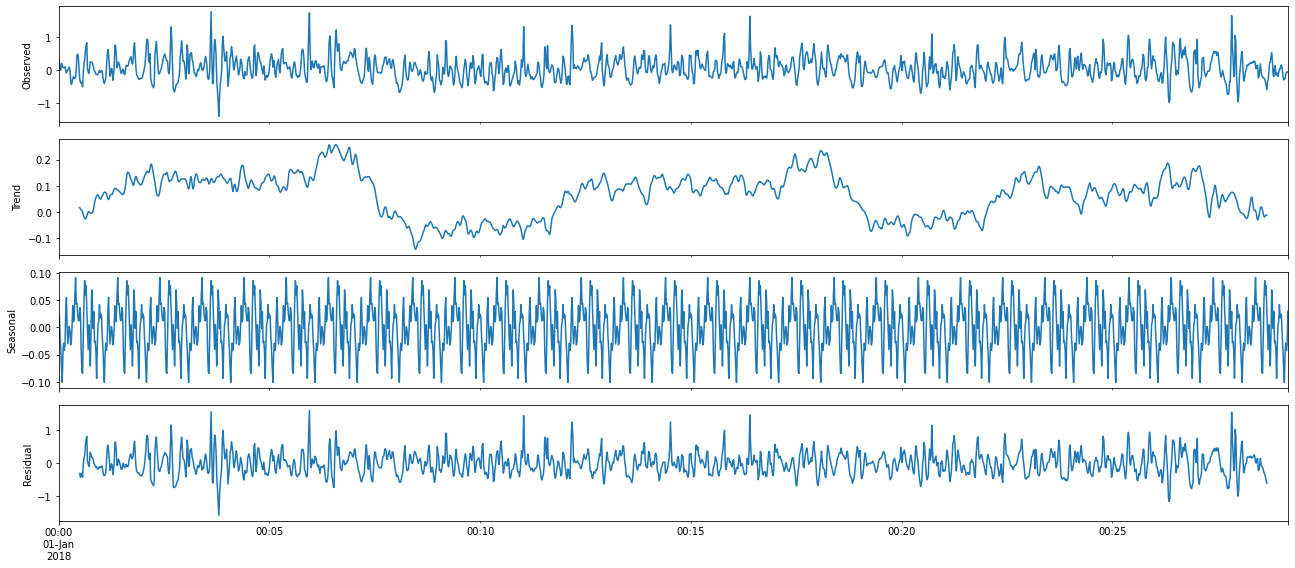

In [22]:
# Your code here:

rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq= 60)
fig = decomposition.plot()
plt.show();
#no hay tendencia, no es estacionaria 

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

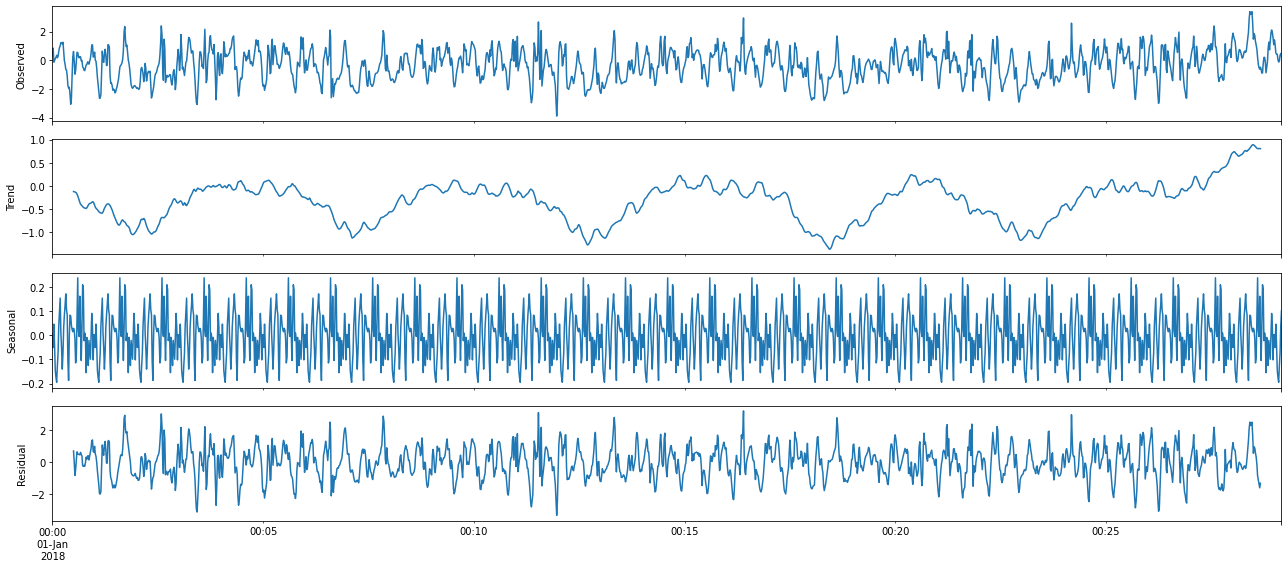

In [23]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq= 60)
fig = decomposition.plot()
plt.show();
#

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

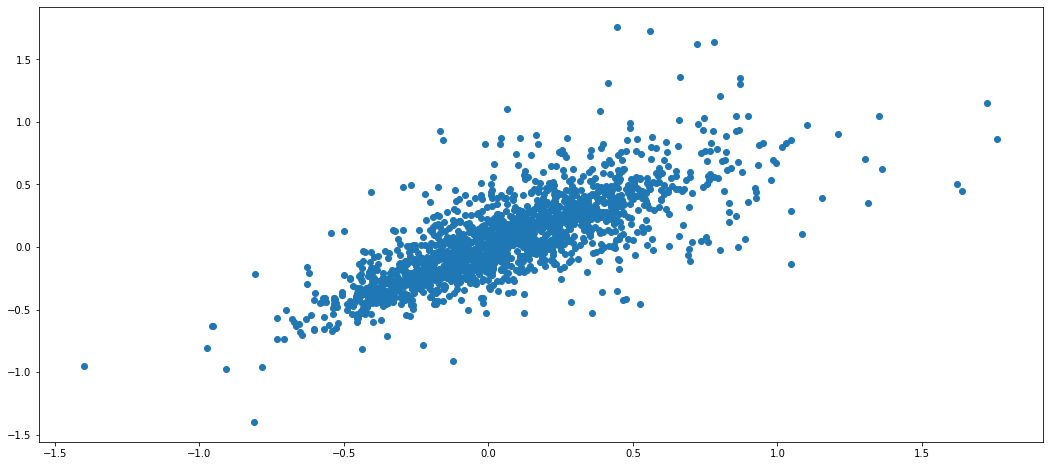

In [24]:
# Your code here:

plt.scatter(sensor['userAcceleration.x'] , sensor['userAcceleration.x'].shift(1)); #utilizando nuestra serie de tiempo contra el valor siguiente, es lo que hace el shift


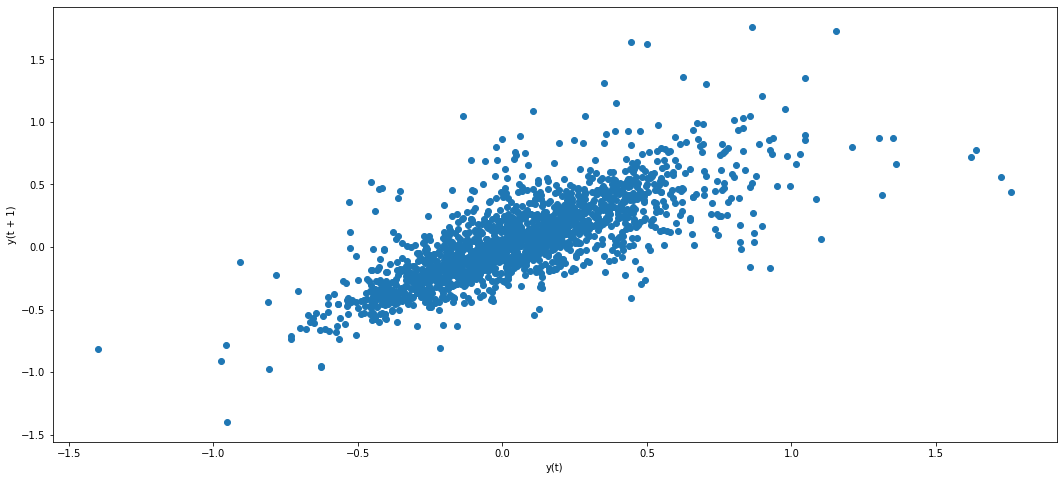

In [25]:
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag= 1);

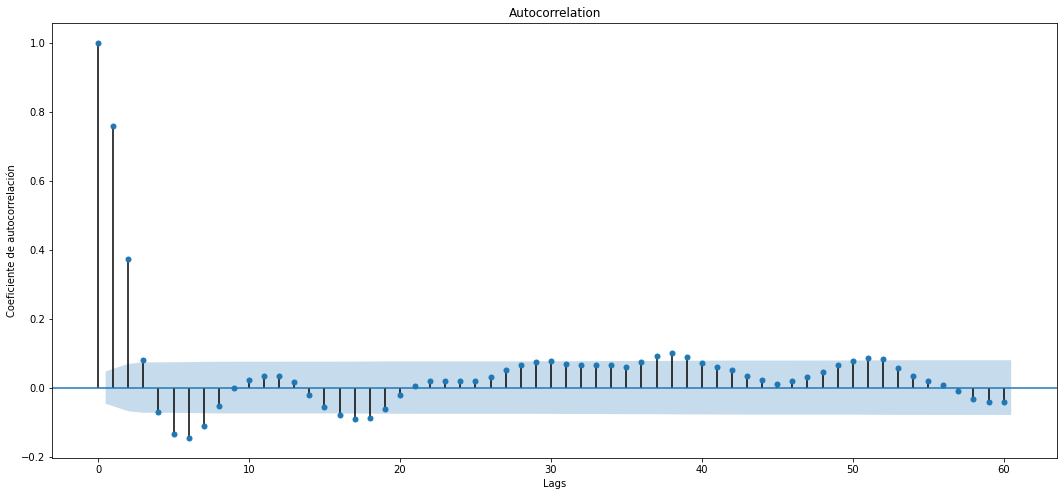

In [33]:
tsaplots.plot_acf(sensor['userAcceleration.x'].values.squeeze(), lags=60)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show();

Create a lag plot for `rotationRate.x`

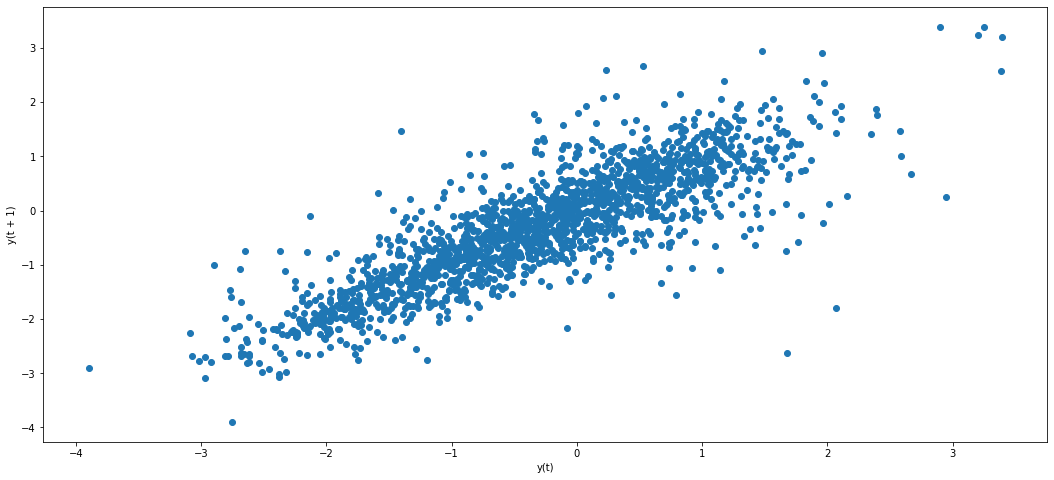

In [26]:
# Your code here:

pd.plotting.lag_plot(sensor['rotationRate.x'], lag= 1);

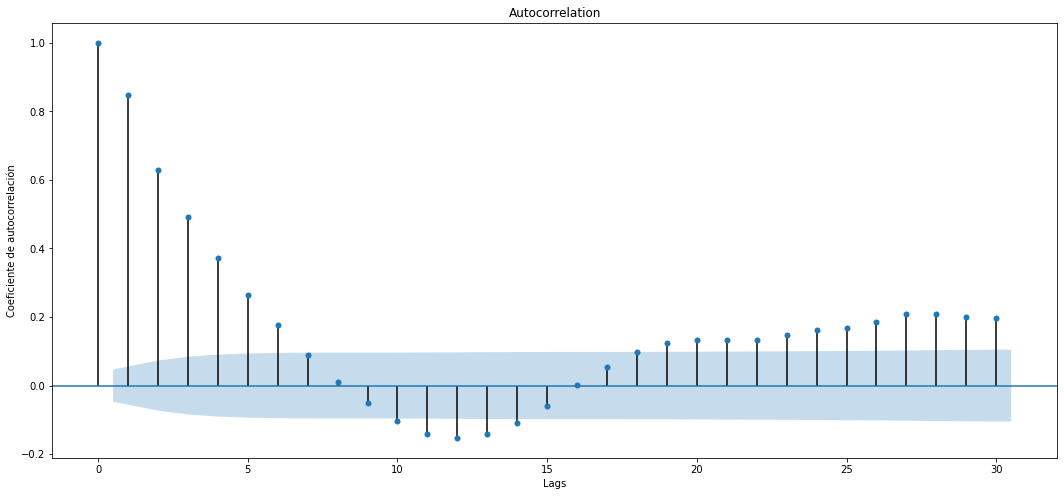

In [31]:
tsaplots.plot_acf(sensor['rotationRate.x'].values.squeeze(), lags=30)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show();


What are your conclusions from both visualizations?

### No hay correlacion para los particulares grupos de datos pero hay un ligero incremento del numero de casos correlacionados para la variable estadistica rotation rate.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [34]:
def viewing_stationarity(df, window=5): #window, rango que queremos que avance para calular la media y la SD
  """Esta función genera un plot para una serie de tiempo
     con su media móvil y su desviación estándar.
  """

  rolmean = df.rolling(window=window).mean() #rolling, tomara los primeros 5 valores del dataset y hace un promedio
  rolstd = df.rolling(window=window).std()

  fig = plt.figure(figsize=(10, 5))
  time_series = plt.plot(df, color='blue', label='original')
  mean = plt.plot(rolmean, color='red', label='media móvil')
  std = plt.plot(rolstd, color='green', label='desviación estándar móvil')
  plt.legend(loc='best')
  plt.show();

In [35]:
class Stationary:
  def __init__(self, significance=0.05): #valor por default de la significancia 
    self.significance_level = significance
    self.pvalue = None  #para saber que se pueden añadir mas cosas 
    self.is_stationary = None

  def ADF(self, values): #metodo ad fiuler, los valores seran las series de tiempo
    result = adfuller(values, autolag='AIC') #autolag= como esta tomando los valores en el espacio, AIC va a buscar los mejores periodos para modelar
#values- valores de la serie de tiempo, el resultado es un diccionario  
    format_results = pd.Series(result[:4], 
                                index=['Statistic', 'P-value',
                                      'Num of Lags', 'Observations']) #este es el diccionario, observation son los valores criticos con un intervalo de confianza de 1,5 y 10
    for k,v in result[4].items():
      format_results[f'Critical Value {k}'] = v

    return format_results

In [36]:
# Your code here:

adf_test = Stationary()
adf_test.ADF(sensor['userAcceleration.x'].values).round(5) #no se pasan ni las series ni el DF, solamente los valores (.values)


Statistic              -17.95799
P-value                  0.00000
Num of Lags              4.00000
Observations          1746.00000
Critical Value 1%       -3.43410
Critical Value 5%       -2.86320
Critical Value 10%      -2.56765
dtype: float64

In [38]:
adf_test.ADF(sensor['rotationRate.x'].values).round(5)

Statistic               -5.26986
P-value                  0.00001
Num of Lags             25.00000
Observations          1725.00000
Critical Value 1%       -3.43415
Critical Value 5%       -2.86322
Critical Value 10%      -2.56766
dtype: float64

What are your conclusions from this test?

In [ ]:
# Your conclusions here:

Ambas variables son estacionarias. se rechaza la Ho

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [42]:
# Your code here:

model_userAcc_x = SARIMAX(sensor['userAcceleration.x'], 
                    order=(2,0,1), 
                    enforce_stationarity=False)

results = model_userAcc_x.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 369.647
Date:                Tue, 10 May 2022   AIC                           -731.294
Time:                        18:46:28   BIC                           -709.427
Sample:                    01-01-2018   HQIC                          -723.211
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9827      0.036     27.439      0.000       0.913       1.053
ar.L2         -0.3619      0.033    -10.941      0.000      -0.427      -0.297
ma.L1          0.1982      0.039      5.048      0.000       0.121       0.275
sigma2         0.0384      0.001     49.789      0.000       0.037       0.040
===================================================================================
Ljung-Box (Q):                       53.27   Jarque-Bera (JB):              1886.06
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.32
Prob(H) (two-sided):                  0.74   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [43]:
sensor.shape[0] * 0.80


1400.8000000000002

In [44]:
sensor.reset_index().iloc[1400, 0]

Timestamp('2018-01-01 00:23:20')

In [45]:

start = sensor.reset_index().iloc[1400, 0]
end = sensor.reset_index().iloc[-1, 0]
start, end


(Timestamp('2018-01-01 00:23:20'), Timestamp('2018-01-01 00:29:10'))

In [46]:

pred = results.predict(start=start, end=end)
pred_ci = results.get_prediction(start=start, end=end).conf_int()
df_pred = pd.DataFrame(pred, index=sensor.iloc[1400:].index, columns=['userAcceleration.x'])


In [47]:

df_prediction = pd.concat([df_pred, pred_ci], axis=1)
df_prediction.head()

,userAcceleration.x,lower userAcceleration.x,upper userAcceleration.x
2018-01-01 00:23:20,0.374816,-0.009075,0.758706
2018-01-01 00:23:21,0.321879,-0.062011,0.705770
2018-01-01 00:23:22,0.011515,-0.372376,0.395406
2018-01-01 00:23:23,-0.042589,-0.426479,0.341302
2018-01-01 00:23:24,-0.092883,-0.476774,0.291007


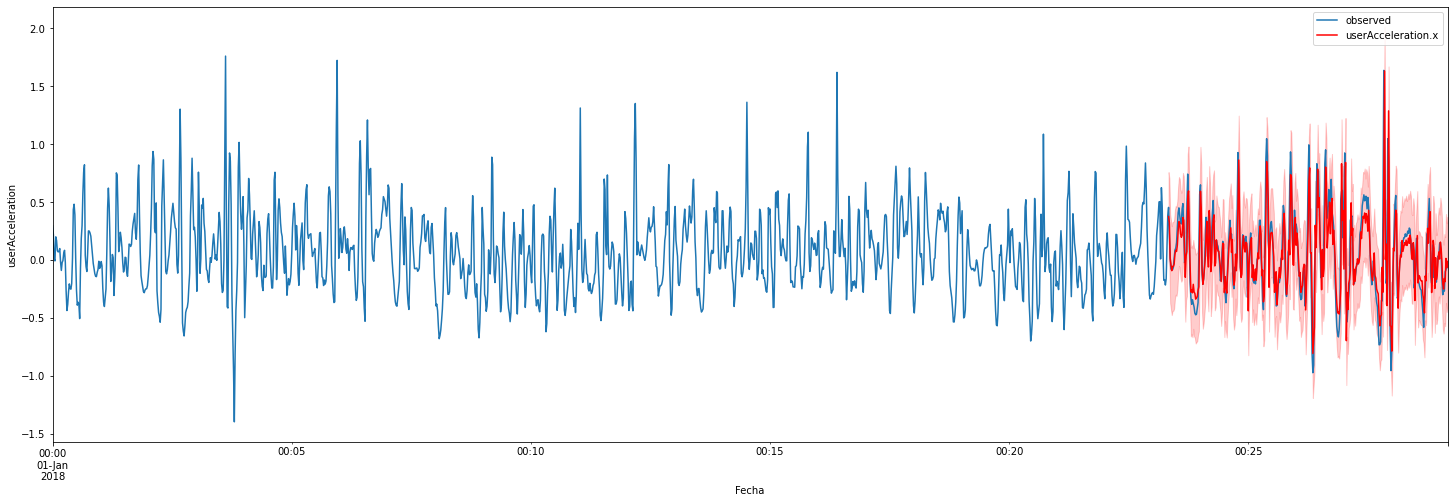

In [50]:
rcParams['figure.figsize'] = 25, 8

ax = sensor['userAcceleration.x'].plot(label='observed')
df_prediction['userAcceleration.x'].plot(c='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('userAcceleration')
plt.legend()

plt.show()
